In [ ]:
library(dplyr)
library(Seurat)
library(stringr)
library(targets)

In [3]:
tar_load(indrop)

In [5]:
table(indrop$spca_subclassif)


        ISC          EB         dEC         aEC     EC-like         mEC 
        286         254         421        1695        2163         238 
        pEC          EE copper/iron         LFC      cardia      others 
        729         555         328         431         194         332 

In [7]:
embedding <- data.frame(
  celltype = indrop$spca_subclassif %>% setNames(NULL),
  featurename = rep(str_glue("SPC{1:30}"), each=ncol(indrop)),
  featurevalue = do.call(c, FetchData(indrop, str_glue("SPARSE_{1:30}")))
)

In [10]:
pctData <- embedding %>%
  group_by(featurename) %>%
  summarise(
    EC = (featurevalue >= 1) %>% subset(celltype %in% c("aEC", "dEC", "mEC", "pEC")) %>% mean(),
    dEC = (featurevalue >= 1) %>% subset(celltype == "dEC") %>% mean(),
    aEC = (featurevalue >= 1) %>% subset(celltype == "aEC") %>% mean(),
    mEC = (featurevalue >= 1) %>% subset(celltype == "mEC") %>% mean(),
    pEC = (featurevalue >= 1) %>% subset(celltype == "pEC") %>% mean(),
  ) %>%
  print()

# A tibble: 30 × 6
   featurename     EC    dEC    aEC    mEC    pEC
   <chr>        <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 SPC1        0.728  0.696  0.878  0.546  0.455 
 2 SPC10       0.0801 0.0570 0.0655 0.0630 0.133 
 3 SPC11       0.249  0.0736 0.228  0.987  0.158 
 4 SPC12       0.341  0.138  0.198  0.0504 0.883 
 5 SPC13       0.113  0.0689 0.129  0.0504 0.121 
 6 SPC14       0.112  0.0523 0.155  0.0462 0.0658
 7 SPC15       0.251  0.0594 0.0690 0.105  0.833 
 8 SPC16       0.0409 0.0285 0.0431 0.0420 0.0425
 9 SPC17       0.540  0.413  0.8    0.139  0.139 
10 SPC18       0.0136 0.0119 0.0136 0.0168 0.0137
# … with 20 more rows


In [ ]:
subset(pctData, EC >= 0.25, select = 3:6)

dEC,aEC,mEC,pEC
<dbl>,<dbl>,<dbl>,<dbl>
0.69596200,0.87787611,0.54621849,0.4554184
0.13776722,0.19823009,0.05042017,0.8834019
0.05938242,0.06902655,0.10504202,0.8326475
0.41330166,0.80000000,0.13865546,0.1385460
0.55106888,0.83421829,0.44537815,0.2839506
0.32779097,0.66194690,0.06722689,0.2414266
0.14251781,0.50029499,0.07563025,0.1879287
0.14726841,0.67728614,0.04621849,0.1289438


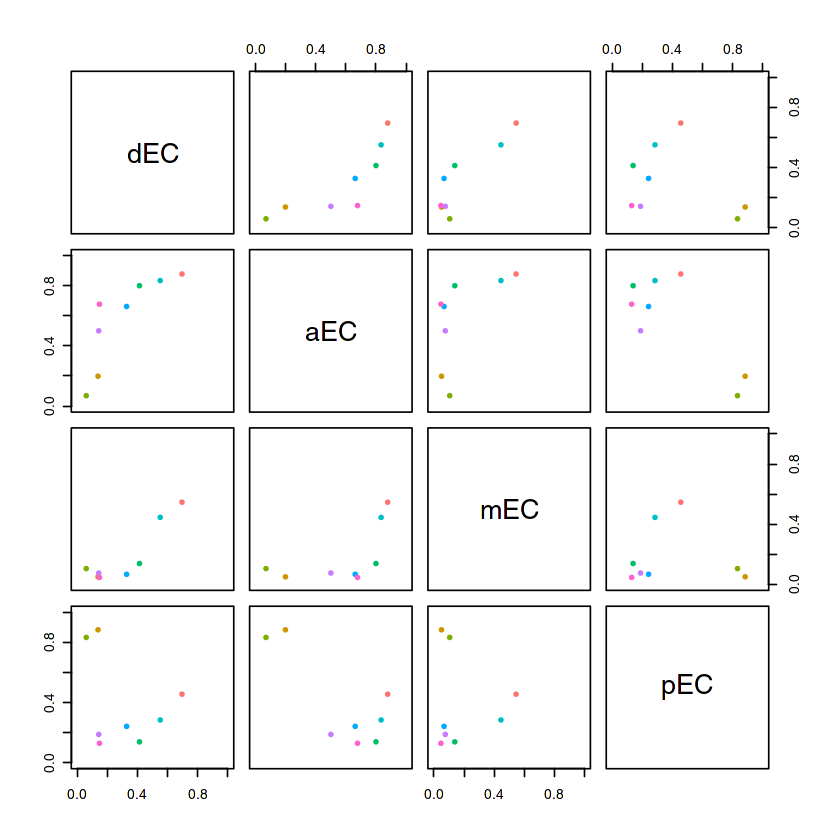

In [33]:
library(scales)
plot(subset(pctData, EC >= 0.25, select = 3:6), pch=19, col = hue_pal()(8), cex=0.5, xlim=c(0,1), ylim=c(0,1))

In [34]:
pdf("figure/FigIndropECHierarchyOfComponents.pdf", w = 4, h = 4)
plot(subset(pctData, EC >= 0.25, select = 3:6), pch=19, col = hue_pal()(8), cex=0.5, xlim=c(0,1), ylim=c(0,1))
dev.off()


png 
  2